## ***Data Preprocessing***

***Punya Mawan***

***Import Library***

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

***Read CSV***

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATAMIN/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


***Check Dtype***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


***Check for null data and duplicated data***

In [ ]:
(df.isnull() | df.empty | df.isna()).sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

because there is no missing value and duplicate data, i can continue processing

***Feature Encoding***

In [ ]:
df_encode = df.copy()

because the gender feature is nominal data. then I use one hot encoding to handle it.

In [ ]:
# Cara 2 untuk one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Membuat Object OneHotEncoder dengan kategori yang disesuaikan dengan isi unique dari kolom
# lalu object digunakan untuk fit kemudian transform
ohe = OneHotEncoder(categories=[list(df_encode.Genre.unique())], handle_unknown='ignore', sparse=False)
y = np.array(df_encode['Genre']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)

# Membuat kolom baru untuk menampung hasil encoding 
df_encode[[ f'Gender_{Genre}' for Genre in df_encode.Genre.unique() ]] = y_transform
df_encode.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Gender_Female
0,1,Male,19,15,39,1.0,0.0
1,2,Male,21,15,81,1.0,0.0
2,3,Female,20,16,6,0.0,1.0
3,4,Female,23,16,77,0.0,1.0
4,5,Female,31,17,40,0.0,1.0


In [ ]:
# jika sudah selesai, hapus kolom awal sebelum di encode

df_encode.drop(columns=['Genre', 'Gender_Female'], inplace=True)
df_encode.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1.0
1,2,21,15,81,1.0
2,3,20,16,6,0.0
3,4,23,16,77,0.0
4,5,31,17,40,0.0


***Outliers***

i need to check outliers

In [ ]:
df_copy = df_encode.copy()

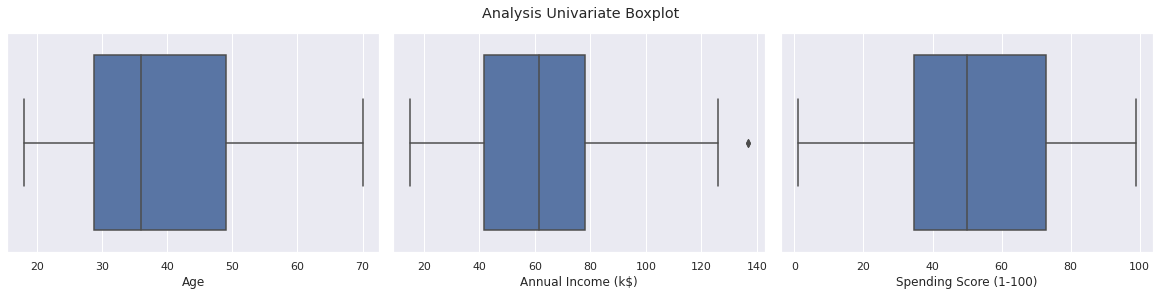

In [ ]:
# check with boxplot
sns.set_theme()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), constrained_layout=True)
plt.suptitle("Analysis Univariate Boxplot")
ax = ax.flatten()
colbox = df_copy.iloc[:, 1:4]
for i, j in enumerate(colbox):
    sns.boxplot(x=df_copy[j], ax=ax[i])

if we look, there are a few outliers. because I will be doing clustering, I will handle no matter how small the outliers are

In [ ]:
def handling_outlier(df, value):
  column = value
  for i in column:
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = Q3 - Q1

    df[i] = df[i].mask(((df[i] > (Q3+(1.5*IQR)))), (Q3+(1.5*IQR)))
    df[i] = df[i].mask(((df[i] < (Q1-(1.5*IQR)))), (Q1-(1.5*IQR)))
  
  return df[i]

In [ ]:
handling_outlier(df_copy, ['Annual Income (k$)'])

0       15.00
1       15.00
2       16.00
3       16.00
4       17.00
        ...  
195    120.00
196    126.00
197    126.00
198    132.75
199    132.75
Name: Annual Income (k$), Length: 200, dtype: float64

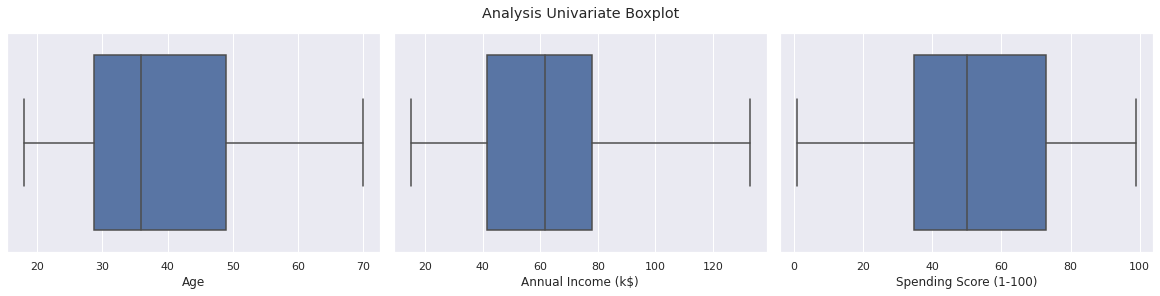

In [ ]:
# check post-handling with boxplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), constrained_layout=True)
plt.suptitle("Analysis Univariate Boxplot")
ax = ax.flatten()
colbox = df_copy.iloc[:, 1:4]
for i, j in enumerate(colbox):
    sns.boxplot(x=df_copy[j], ax=ax[i])

***Seaborn Correlation Heatmap***

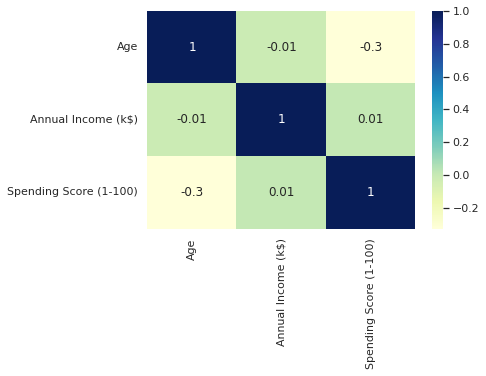

In [ ]:
sns.heatmap(df_copy.iloc[:, 1:4].corr(), annot = True, fmt = '.1g', cmap = 'YlGnBu')
plt.show()

***Data Distribution***

I need to look at the distribution of the data to determine if I should choose to use standardscaler or minmaxscaler.

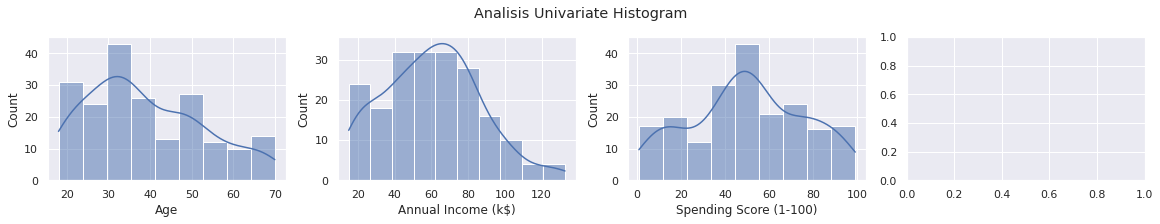

In [ ]:
# histplot
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(16,3), constrained_layout=True)
plt.suptitle("Analisis Univariate Histogram")
ax=ax.flatten()
colhist = df_copy.iloc[:, 1:4]
for i, j in enumerate(colhist):
    sns.histplot(df_copy[j], ax=ax[i], kde=True)

because the data distribution is skewed so I decided to use minmaxscaler

***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
columns = list(df_copy.iloc[:,1:].columns)
sc.fit(df_copy[columns])
df_copy_scaled = sc.transform(df_copy[columns])
df_copy.iloc[:, 1:] = df_copy_scaled
df_scaled = df_copy
df_scaled

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,0.019231,0.000000,0.387755,1.0
1,2,0.057692,0.000000,0.816327,1.0
2,3,0.038462,0.008493,0.051020,0.0
3,4,0.096154,0.008493,0.775510,0.0
4,5,0.250000,0.016985,0.397959,0.0
...,...,...,...,...,...
195,196,0.326923,0.891720,0.795918,0.0
196,197,0.519231,0.942675,0.275510,0.0
197,198,0.269231,0.942675,0.744898,1.0
198,199,0.269231,1.000000,0.173469,1.0


Instruction : Tampilkan scatter plot sebelum clustering dengan kombinasi 4 atribut

In here I show only 3 attributes, because the gender attribute is an ordinal type that only has a binary value.

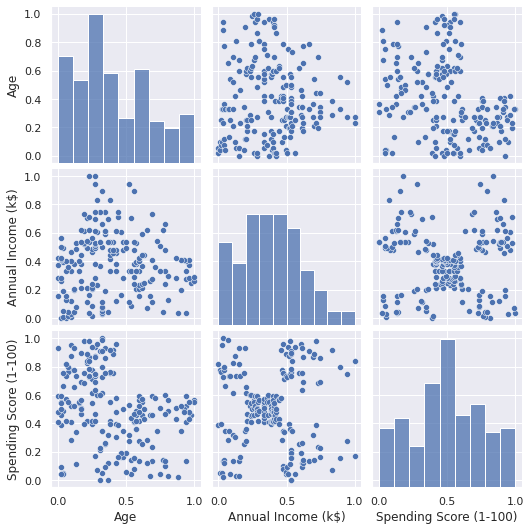

In [ ]:
sns.pairplot(df_scaled.iloc[:, 1:4])  
plt.show()

because it has done data preprocessing. I think the dataset is ready to use

## ***Modelling using K-Means Clustering Algorithm***

In [ ]:
df_copy = df_scaled.copy()

In [ ]:
features = df_copy[['Annual Income (k$)', 'Spending Score (1-100)']]
features

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008493,0.051020
3,0.008493,0.775510
4,0.016985,0.397959
...,...,...
195,0.891720,0.795918
196,0.942675,0.275510
197,0.942675,0.744898
198,1.000000,0.173469


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def KMeansModel(df, n_cluster):
  global model, predict
  model = KMeans(n_clusters=n_cluster, init='k-means++', random_state=42)
  predict = model.fit_predict(df)
  print(predict)

def check_silhouette_score(features):
  print(silhouette_score(features,model.labels_))

***n_cluster == 3***

In [ ]:
KMeansModel(features, 3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [ ]:
check_silhouette_score(features)

0.4530723955341769


In [ ]:
df_cluster = df.copy()
df_cluster['cluster']=predict
df_cluster.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


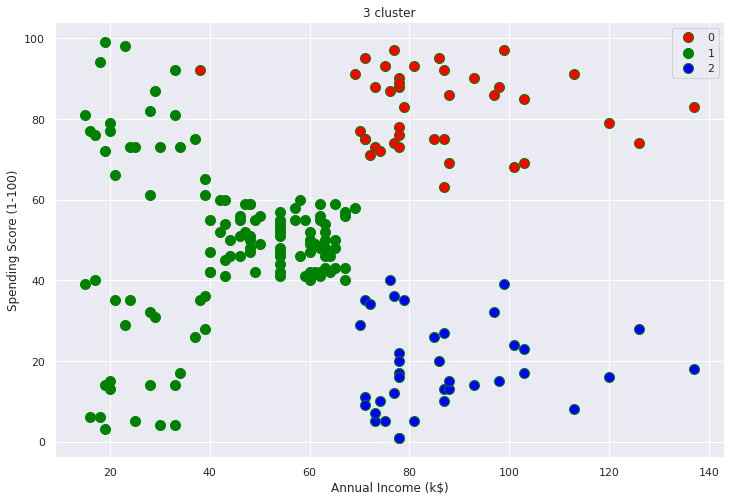

In [ ]:
fig = plt.figure(figsize=(12,8))

plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==0], df_cluster['Spending Score (1-100)'][df_cluster.cluster==0], label=0, c='red', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==1], df_cluster['Spending Score (1-100)'][df_cluster.cluster==1], label=1, c='green', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==2], df_cluster['Spending Score (1-100)'][df_cluster.cluster==2], label=2, c='blue', s=100, edgecolors='green')

plt.legend()
plt.title('3 cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

***n_cluster == 4***

In [ ]:
KMeansModel(features, 4)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
check_silhouette_score(features)

0.4975158025501


In [ ]:
df_cluster = df.copy()
df_cluster['cluster']=predict
df_cluster.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


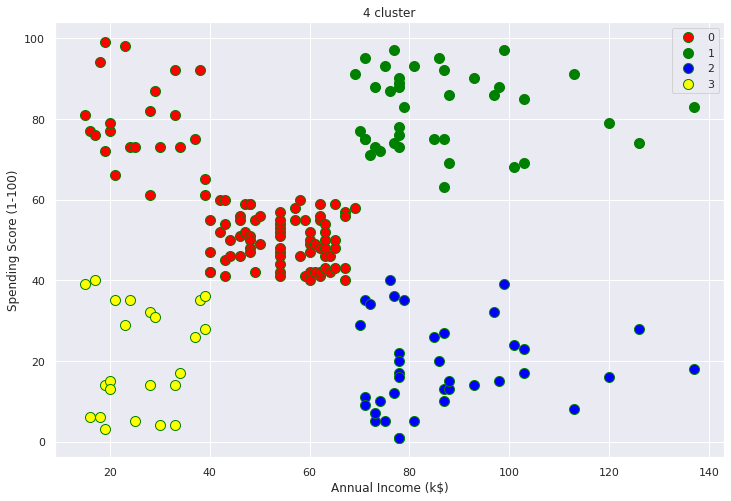

In [ ]:
fig = plt.figure(figsize=(12,8))

plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==0], df_cluster['Spending Score (1-100)'][df_cluster.cluster==0], label=0, c='red', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==1], df_cluster['Spending Score (1-100)'][df_cluster.cluster==1], label=1, c='green', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==2], df_cluster['Spending Score (1-100)'][df_cluster.cluster==2], label=2, c='blue', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==3], df_cluster['Spending Score (1-100)'][df_cluster.cluster==3], label=3, c='yellow', s=100, edgecolors='green')

plt.legend()
plt.title('4 cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

***n_cluster == 5***

In [ ]:
KMeansModel(features, 5)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [ ]:
check_silhouette_score(features)

0.5602376471765546


In [ ]:
df_cluster = df.copy()
df_cluster['cluster']=predict
df_cluster.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


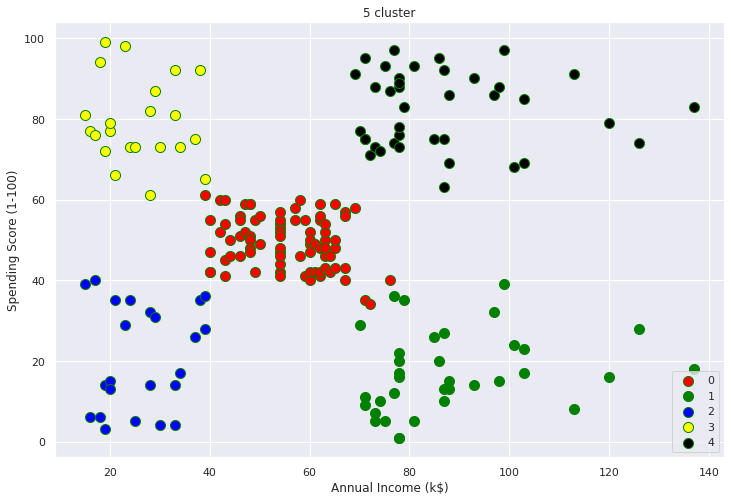

In [ ]:
fig = plt.figure(figsize=(12,8))

plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==0], df_cluster['Spending Score (1-100)'][df_cluster.cluster==0], label=0, c='red', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==1], df_cluster['Spending Score (1-100)'][df_cluster.cluster==1], label=1, c='green', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==2], df_cluster['Spending Score (1-100)'][df_cluster.cluster==2], label=2, c='blue', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==3], df_cluster['Spending Score (1-100)'][df_cluster.cluster==3], label=3, c='yellow', s=100, edgecolors='green')
plt.scatter(df_cluster['Annual Income (k$)'][df_cluster.cluster==4], df_cluster['Spending Score (1-100)'][df_cluster.cluster==4], label=4, c='black', s=100, edgecolors='green')

plt.legend()
plt.title('5 cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In my opinion, it is better to use n_cluster == 5. because the clustering visualization obtained has a fairly clear distribution of clusters. this is supported by the silhoute_score which has a better score than the other n_numbers cluste, which is 0.56.

# ***Optional nilai tambah (tidak wajib dikerjakan)***

***elbow method***

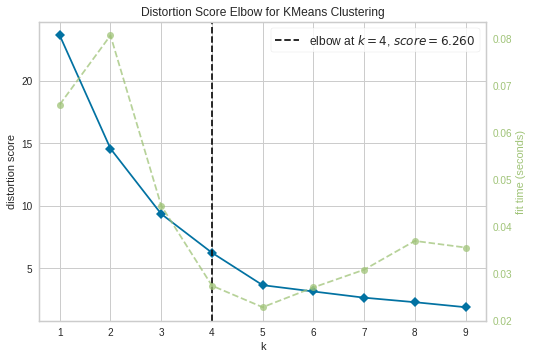

In [ ]:
#K-cluster with elbow score
from yellowbrick.cluster import KElbowVisualizer

# menentukan jumlah klustering dari 1 - 10 (x)
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(features)
visualize.poof()

we can see here, for clustering using 2 features 'annual income' and 'spending score', the elbow method recommends using 4 clusters because they have optimal distortion values. However, above I have experimented with using the number of clusters n=3,4,5 and the result is that the number of clusters n=4 is not optimal to use. can be seen in the results of the clustering scatter is still not clear.

***PCA Analysis***

In [ ]:
df_copy = df_scaled.copy()
features_pca = df_copy.iloc[:, 2:4]
features_pca

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008493,0.051020
3,0.008493,0.775510
4,0.016985,0.397959
...,...,...
195,0.891720,0.795918
196,0.942675,0.275510
197,0.942675,0.744898
198,1.000000,0.173469


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features_pca)

PCA(n_components=2)

In [ ]:
df = pd.DataFrame(pca.transform(features_pca), columns=['component 1', 'component 2'])
df

,component 1,component 2
0,0.125375,-0.383107
1,-0.303019,-0.395455
2,0.461725,-0.364917
3,-0.262464,-0.385790
4,0.114686,-0.366423
...,...,...
195,-0.308309,0.496483
196,0.210415,0.562410
197,-0.258778,0.548887
198,0.310762,0.622651


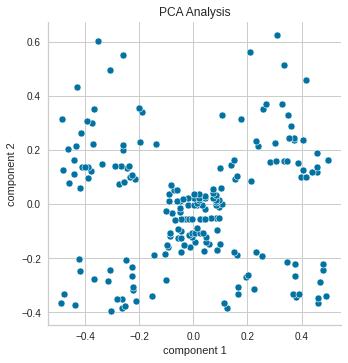

In [ ]:
sns.relplot(data=df, x='component 1', y='component 2').set(title='PCA Analysis')

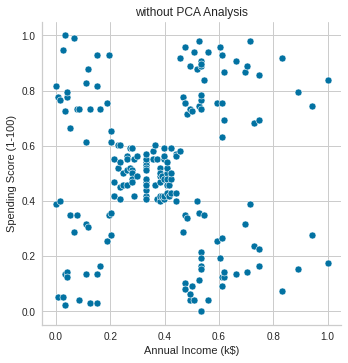

In [ ]:
df_copy = df_scaled.copy()
sns.relplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)').set(title='without PCA Analysis')

for pca analysis with features reduction can still maintain the shape of the data

***show 3D Visualization***

In [ ]:
df_copy = df_scaled.copy()

In [ ]:
features2 = df_copy[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
features2

,Annual Income (k$),Spending Score (1-100),Age
0,0.000000,0.387755,0.019231
1,0.000000,0.816327,0.057692
2,0.008493,0.051020,0.038462
3,0.008493,0.775510,0.096154
4,0.016985,0.397959,0.250000
...,...,...,...
195,0.891720,0.795918,0.326923
196,0.942675,0.275510,0.519231
197,0.942675,0.744898,0.269231
198,1.000000,0.173469,0.269231


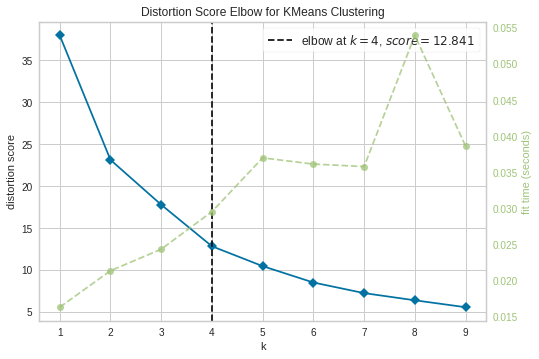

In [ ]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(features2)
visualize.poof()

Elbow method suggests using 4 clusters. so I decided to use 4 clusters

***n_cluster == 4***

In [ ]:
KMeansModel(features2, 4)

[1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 3 1 1 1 2 2 2 2 1 3 0 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [ ]:
check_silhouette_score(features)

0.26924129547809766


In [ ]:
df_cluster = df_encode.copy()
df_cluster['cluster']=predict
df_cluster.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
0,1,19,15,39,1.0,1
1,2,21,15,81,1.0,1
2,3,20,16,6,0.0,1
3,4,23,16,77,0.0,1
4,5,31,17,40,0.0,1


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_cluster, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='cluster')
fig.show()

this is the result of 3d visualization with 3 features